## 文字探勘作業四

In [1]:
#引入套件
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
import re
from collections import Counter

In [2]:
# 讀取從pandas的結構化資料，但內文的句子尚未擷取出合適斷詞
orgdata = pd.read_csv(r"C:\Users\tien\Documents\GitHub\PL\file\W9\觀光景點資料.csv")

In [3]:
orgdata.head()

,Id,Name,Zone,Description,Tel,Add,Region,Town,Travellinginfo,Opentime,Picdescribe1,Px,Py,Orgclass,Ticketinfo,Remarks,Keyword
0,0,宏亞食品巧克力觀光工廠,NaN,巧克力共和國是一座以巧克力為主題的觀光工廠，建築設計、館內主題設計皆以巧克力為主題，這裡也提...,886-3-3656555,桃園縣八德市建國路386號,桃園市,八德區,NaN,NaN,NaN,121.297187,24.943325,觀光工廠,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,桃園，宏亞，巧克力，觀光工廠
1,1,台灣金屬創意館,NaN,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...,886-6-2036735#245,台南市永康區永科環路598號,臺南市,永康區,NaN,NaN,NaN,120.275724,23.045063,觀光工廠,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,台南，志鋼，金屬，觀光工廠
2,2,臺灣菸酒(股)公司林口觀光酒廠,NaN,林口酒廠為北部地區產能最大、設備最現代化的清酒、紅麴葡萄酒生產工廠。廠內有產品推廣中心，開放...,886-3-3283001#430,桃園縣龜山鄉文化一路55號,桃園市,龜山區,NaN,NaN,NaN,121.375231,25.056168,觀光工廠,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,林口，菸酒，酒廠，觀光工廠
3,3,水璉、牛山海岸,NaN,"水璉位在花蓮縣壽豐鄉海濱，為阿美族世居之地，早在3,500年前即有繩紋陶文化之先民居住於此。...",886-3-8601400,花蓮縣974壽豐鄉牛山39之5號,花蓮縣,壽豐鄉,南下：於花蓮火車站前的花蓮客運，搭乘往豐濱、成功方向的海線班車，經花蓮大橋，約40～50分鐘...,每日10:00-18:00,當整個東海岸被層層的消坡塊鎖住時，綿延兩公里長的水璉牛山，卻散發出難能可貴的自然光采,121.569400,23.763440,NaN,牛山呼庭園區需付50元門票，可抵用飲品。,東海岸的石頭雖美，但請切勿撿取。走米棧古道，記得帶瓶水解渴。,NaN
4,4,石梯坪,NaN,石梯坪位在花蓮縣豐濱鄉石梯灣的南側，整個區域是一個面積極大的海岸階地，海蝕地形十分發達，海蝕...,886-3-8781452,花蓮縣977豐濱鄉石梯坪52號,花蓮縣,豐濱鄉,南下：由花蓮火車站前搭往成功、靜浦或台東等地的花蓮、鼎東客運海線班車，在石梯坪下車。 北上：...,全天候開放露營電話預約時間：09:00~18:00電話：0922-211336 呂先生,宛如鬼斧神工般的石梯坪海蝕地形,121.511730,23.485250,NaN,大型車：假日200元、非假日170元小型車：假日60元、非假日50元機車：假日20元、非假日15元,1.石梯坪沒有遮陽設施，海邊日照強，要做好防曬；裝備也要齊全，除了遮陽的帽子、長褲、長袖，解...,NaN


In [4]:
orgdata.index

RangeIndex(start=0, stop=5676, step=1)

In [5]:
# 結巴套件的練習，和檔案內容無關
documents = ['過失責任車禍賠償']
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tien\AppData\Local\Temp\jieba.cache
Loading model cost 0.551 seconds.
Prefix dict has been built successfully.


過失責/任車/禍/賠償


In [6]:
# test
for s in documents:
    seg_list = jieba.cut(s)
    print(seg_list)
    print(' '.join(seg_list))

<generator object Tokenizer.cut at 0x000001F465765890>
過失責 任車 禍 賠償


In [7]:
jieba.load_userdict(r"C:\Users\tien\Documents\GitHub\PL\file\W9\test_dict.txt")

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print(' '.join(seg_list))

過失 責任 車禍 賠償


In [8]:
orgdata['seg'] = ""
orgdata.head()

,Id,Name,Zone,Description,Tel,Add,Region,Town,Travellinginfo,Opentime,Picdescribe1,Px,Py,Orgclass,Ticketinfo,Remarks,Keyword,seg
0,0,宏亞食品巧克力觀光工廠,NaN,巧克力共和國是一座以巧克力為主題的觀光工廠，建築設計、館內主題設計皆以巧克力為主題，這裡也提...,886-3-3656555,桃園縣八德市建國路386號,桃園市,八德區,NaN,NaN,NaN,121.297187,24.943325,觀光工廠,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,桃園，宏亞，巧克力，觀光工廠,
1,1,台灣金屬創意館,NaN,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...,886-6-2036735#245,台南市永康區永科環路598號,臺南市,永康區,NaN,NaN,NaN,120.275724,23.045063,觀光工廠,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,台南，志鋼，金屬，觀光工廠,
2,2,臺灣菸酒(股)公司林口觀光酒廠,NaN,林口酒廠為北部地區產能最大、設備最現代化的清酒、紅麴葡萄酒生產工廠。廠內有產品推廣中心，開放...,886-3-3283001#430,桃園縣龜山鄉文化一路55號,桃園市,龜山區,NaN,NaN,NaN,121.375231,25.056168,觀光工廠,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,林口，菸酒，酒廠，觀光工廠,
3,3,水璉、牛山海岸,NaN,"水璉位在花蓮縣壽豐鄉海濱，為阿美族世居之地，早在3,500年前即有繩紋陶文化之先民居住於此。...",886-3-8601400,花蓮縣974壽豐鄉牛山39之5號,花蓮縣,壽豐鄉,南下：於花蓮火車站前的花蓮客運，搭乘往豐濱、成功方向的海線班車，經花蓮大橋，約40～50分鐘...,每日10:00-18:00,當整個東海岸被層層的消坡塊鎖住時，綿延兩公里長的水璉牛山，卻散發出難能可貴的自然光采,121.569400,23.763440,NaN,牛山呼庭園區需付50元門票，可抵用飲品。,東海岸的石頭雖美，但請切勿撿取。走米棧古道，記得帶瓶水解渴。,NaN,
4,4,石梯坪,NaN,石梯坪位在花蓮縣豐濱鄉石梯灣的南側，整個區域是一個面積極大的海岸階地，海蝕地形十分發達，海蝕...,886-3-8781452,花蓮縣977豐濱鄉石梯坪52號,花蓮縣,豐濱鄉,南下：由花蓮火車站前搭往成功、靜浦或台東等地的花蓮、鼎東客運海線班車，在石梯坪下車。 北上：...,全天候開放露營電話預約時間：09:00~18:00電話：0922-211336 呂先生,宛如鬼斧神工般的石梯坪海蝕地形,121.511730,23.485250,NaN,大型車：假日200元、非假日170元小型車：假日60元、非假日50元機車：假日20元、非假日15元,1.石梯坪沒有遮陽設施，海邊日照強，要做好防曬；裝備也要齊全，除了遮陽的帽子、長褲、長袖，解...,NaN,


In [41]:
jieba.analyse.set_stop_words(r"C:\Users\tien\Documents\GitHub\PL\file\W9\stopwords.txt")
index = 0
for documents in orgdata['Description']:
    seg_list = jieba.analyse.extract_tags(str(documents), 150)
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\tien\AppData\Local\Temp\ipykernel_18728\3832514975.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
orgdata['seg']

0       [巧克力, 為主題, 設計, 國是, 觀光, 工廠, 建築, 內主題, 豐富, 相關, 知識...
1       [金屬, 觀光, 台灣, 創意館, 工廠, 並觸, 柔軟, 館區, 充滿, 各種, 驚奇, ...
2       [酒廠, 地區, 產能, 設備, 現代化, 生產, 工廠, 廠內, 有產品, 推廣, 開放參...
3       [阿美族, 水璉位, 花蓮縣, 壽豐鄉, 海濱, 500, 繩紋陶, 水璉, 海灘, Hud...
4       [石梯, 海蝕, 活動, 露營區, 此處, 電話, 03, 阿美族, 坪位, 花蓮縣, 豐濱...
                              ...                        
5671                                                [nan]
5672                                                [nan]
5673                                                [nan]
5674                                                [nan]
5675                                                [nan]
Name: seg, Length: 5676, dtype: object

In [11]:
Counter(orgdata['Region']).keys()

dict_keys(['桃園市', '臺南市', '花蓮縣', '臺東縣', '澎湖縣', '屏東縣', '連江縣', '南投縣', '苗栗縣', '新竹縣', '臺中市', '彰化縣', '宜蘭縣', '嘉義縣', '高雄市', '新北市', '基隆市', '雲林縣', '金門縣', '新竹市', '嘉義市', '臺北市'])

In [36]:
show_key = pd.DataFrame(Counter(orgdata['Region']).keys())
show_values = pd.DataFrame(Counter(orgdata['Region']).values())
df = [show_key, show_values]

In [38]:
result = pd.concat(df, axis=1)
result.columns = ['Region', 'Number of attractions']
result.head()

,Region,Number of attractions
0,桃園市,262
1,臺南市,489
2,花蓮縣,147
3,臺東縣,286
4,澎湖縣,304


In [40]:
import plotly.express as px
import pandas as pd

px.bar(result, x='Region', y='Number of attractions', title='Number of attractions in all counties in Taiwan')

In [51]:
show_sub = orgdata['Region']=='花蓮縣'
subdata = orgdata[show_sub]
subdata

,Id,Name,Zone,Description,Tel,Add,Region,Town,Travellinginfo,Opentime,Picdescribe1,Px,Py,Orgclass,Ticketinfo,Remarks,Keyword,seg
3,3,水璉、牛山海岸,NaN,"水璉位在花蓮縣壽豐鄉海濱，為阿美族世居之地，早在3,500年前即有繩紋陶文化之先民居住於此。...",886-3-8601400,花蓮縣974壽豐鄉牛山39之5號,花蓮縣,壽豐鄉,南下：於花蓮火車站前的花蓮客運，搭乘往豐濱、成功方向的海線班車，經花蓮大橋，約40～50分鐘...,每日10:00-18:00,當整個東海岸被層層的消坡塊鎖住時，綿延兩公里長的水璉牛山，卻散發出難能可貴的自然光采,121.569400,23.763440,NaN,牛山呼庭園區需付50元門票，可抵用飲品。,東海岸的石頭雖美，但請切勿撿取。走米棧古道，記得帶瓶水解渴。,NaN,"[阿美族, 水璉位, 花蓮縣, 壽豐鄉, 海濱, 500, 繩紋陶, 水璉, 海灘, Hud..."
4,4,石梯坪,NaN,石梯坪位在花蓮縣豐濱鄉石梯灣的南側，整個區域是一個面積極大的海岸階地，海蝕地形十分發達，海蝕...,886-3-8781452,花蓮縣977豐濱鄉石梯坪52號,花蓮縣,豐濱鄉,南下：由花蓮火車站前搭往成功、靜浦或台東等地的花蓮、鼎東客運海線班車，在石梯坪下車。 北上：...,全天候開放露營電話預約時間：09:00~18:00電話：0922-211336 呂先生,宛如鬼斧神工般的石梯坪海蝕地形,121.511730,23.485250,NaN,大型車：假日200元、非假日170元小型車：假日60元、非假日50元機車：假日20元、非假日15元,1.石梯坪沒有遮陽設施，海邊日照強，要做好防曬；裝備也要齊全，除了遮陽的帽子、長褲、長袖，解...,NaN,"[石梯, 海蝕, 活動, 露營區, 此處, 電話, 03, 阿美族, 坪位, 花蓮縣, 豐濱..."
5,5,長虹橋,NaN,長虹橋橫跨秀姑巒溪，連接靜浦與港口兩聚落，亦是秀姑巒溪泛舟的終點站；橋分新舊兩座橋，新橋採鮮...,886-3-8671326,花蓮縣977豐濱鄉台11線68公里處,花蓮縣,豐濱鄉,南下：由花蓮火車站前搭往成功、靜浦或台東等地的花蓮、鼎東客運海線班車，在長虹橋站下車，再依指...,全天候開放,橫跨秀姑巒溪，連接靜浦與港口兩聚落的新長虹橋,121.489040,23.468450,NaN,免費,NaN,NaN,"[姑巒, 白如玉, 泛舟, 大岩, 步道, 橋橫, 跨秀, 連接, 靜浦, 終點, 橋分, ..."
6,6,北回歸線,NaN,北回歸線標碑位在北緯23.5度，是太陽直射地球的北界，也是亞熱帶與熱帶的分界。靜浦的北回歸線...,886-3-8671326,花蓮縣977豐濱鄉台11線70.5公里處,花蓮縣,豐濱鄉,南下：由花蓮火車站前搭往成功、靜浦或台東等地的花蓮、鼎東客運海線班車，在北回歸線標碑下車。北...,全年開放,北回歸線標碑,121.496170,23.451410,NaN,免費,1.北回歸線位於北緯23.5度，它是太陽直射地球的北界；換言之，夏至時太陽沿著此緯度線東昇西...,NaN,"[北回, 歸線, 標碑, 北緯, 23.5, 太陽, 亞熱帶, 熱帶, 靜浦, 11, 70..."
26,26,花蓮遊客中心,NaN,沿著台11線走，順著蜿蜒的道路來到東海岸風景區最北端的花蓮遊客中心，坐落於山坡上的遊客中心，...,886-3-8671326,花蓮縣974壽豐鄉鹽寮村大坑5號,花蓮縣,壽豐鄉,南下：於花蓮火車站前的花蓮客運，搭乘往豐濱、靜浦，或是台東方向的海線班車，抵達遠雄海洋公園後...,星期日: 08:30 - 17:00星期一: 08:30 - 17:00星期二: 08:30...,鳥瞰花蓮遊客中心,121.602410,23.904550,NaN,NaN,NaN,NaN,"[海岸, 中心, 花蓮遊客, 遊客, 山坡, 展示室, 太平洋, 沿著台, 11, 順著, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,3270,龍泉親水公園,NaN,隸屬生態親水公園的龍泉親水公園占地約為一千二佰坪，位置坐落於佳山基地聯絡道旁的農地，舊時因灌...,886-3-8267223,花蓮縣新城鄉佳林村,花蓮縣,新城鄉,NaN,08:00-17:30,NaN,121.603109,24.017313,NaN,NaN,NaN,NaN,"[親水公園, 空間, 水源, 一千二, 隸屬, 生態, 龍泉, 佰坪, 佳山, 聯絡, 農地..."
3271,3271,郭子究音樂館,NaN,「郭子究音樂文化館」規劃主軸有二個方向，其一是以「郭子究音樂文化館」展演、經營、體驗等相關設...,886-3-8235466,花蓮市民權七街1巷10號,花蓮縣,花蓮市,NaN,10:00-16:30,NaN,121.624659,23.987299,NaN,NaN,NaN,NaN,"[展演, 郭子究, 音樂, 經營, 體驗, 空間, 規劃, 主軸有, 二個, 相關, 設施,..."
3272,3272,七七高地,NaN,過去做為軍事要塞的七七高地，是個極少數遊客會去的地方，地勢不高，但景色絕美，是一處能夠環景3...,886-3-8227171,花蓮縣壽豐鄉台11線6.5公里處產業道路上,花蓮縣,壽豐鄉,NaN,全天候開放,NaN,121.607620,23.932820,NaN,NaN,NaN,NaN,"[七七, 高地, 過去, 軍事, 極少, 數遊, 客會, 地勢, 絕美, 環景, 360, ..."
3273,3273,將軍府（美崙溪畔日式宿舍）,NaN,美崙溪畔日式宿舍位於花蓮市中正橋旁，這個宿舍群在日本時代原本是提供花蓮港分屯大隊軍官住宿的宿...,886-3-8227121,花蓮市中正路622巷6號,花蓮縣,花蓮市,NaN,全天候開放,NaN,121.613226,23.980629,NaN,NaN,NaN,NaN,"[宿舍, 營所通, 中正, 溪畔, 美崙, 花蓮市, 橋旁, 這個, 群在, 時代, 花蓮港..."


In [52]:
show_sub

0       False
1       False
2       False
3        True
4        True
        ...  
5671    False
5672    False
5673    False
5674    False
5675    False
Name: Region, Length: 5676, dtype: bool

In [53]:
subdata.to_csv('HW9花蓮縣景點.csv') 

In [54]:
type(subdata['seg'])

pandas.core.series.Series

In [55]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [56]:
subdata_seg_list

[['阿美族',
  '水璉位',
  '花蓮縣',
  '壽豐鄉',
  '海濱',
  '500',
  '繩紋陶',
  '水璉',
  '海灘',
  'Hudin',
  '呼定',
  '牧場',
  '群相',
  '豐富',
  '幾乎',
  '東部',
  '縮影',
  '劃定',
  '生態',
  '保護區',
  '綿延數',
  '沙灘',
  '絕佳',
  '臨海',
  '樂園',
  '牛山',
  '植物',
  '座落在',
  '世居',
  '美景',
  '意即',
  '先民',
  '草地',
  '海岸',
  '大片',
  '之地',
  '年前',
  '居住',
  '秘密',
  '南方',
  '公里',
  '一片',
  '文化',
  '自然'],
 ['石梯',
  '海蝕',
  '活動',
  '露營區',
  '此處',
  '電話',
  '03',
  '阿美族',
  '坪位',
  '花蓮縣',
  '豐濱',
  '灣的',
  '南側',
  '整個',
  '區域',
  '面積',
  '極大',
  '階地',
  '發達',
  '海蝕溝',
  '是壺',
  '穴景觀',
  '堪稱',
  '台灣',
  '遊客',
  '觀察潮間',
  '豐富',
  '生態',
  '潛水',
  '選擇',
  '設備',
  '捕魚',
  '豐年',
  '祭為',
  '同時',
  '台灣賞',
  '8781452',
  '8781599',
  '族群',
  '夜宿',
  '工作站',
  '源地',
  '比比皆是',
  '珊瑚礁',
  '隆起',
  '亦可',
  '海岸',
  '主要',
  '夏天',
  '地形',
  '平台',
  '完善',
  '尤其',
  '第一'],
 ['姑巒',
  '白如玉',
  '泛舟',
  '大岩',
  '步道',
  '橋橫',
  '跨秀',
  '連接',
  '靜浦',
  '終點',
  '橋分',
  '新舊',
  '兩座橋',
  '新橋',
  '採鮮艷',
  '紅色',
  '橋面',
  '規劃',
  '車道',
  '腳踏車',
  '專用',
  '活動',


In [57]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [58]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [59]:
mask = np.array(Image.open(r"C:\Users\tien\Documents\GitHub\PL\file\W9\Halian.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [60]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

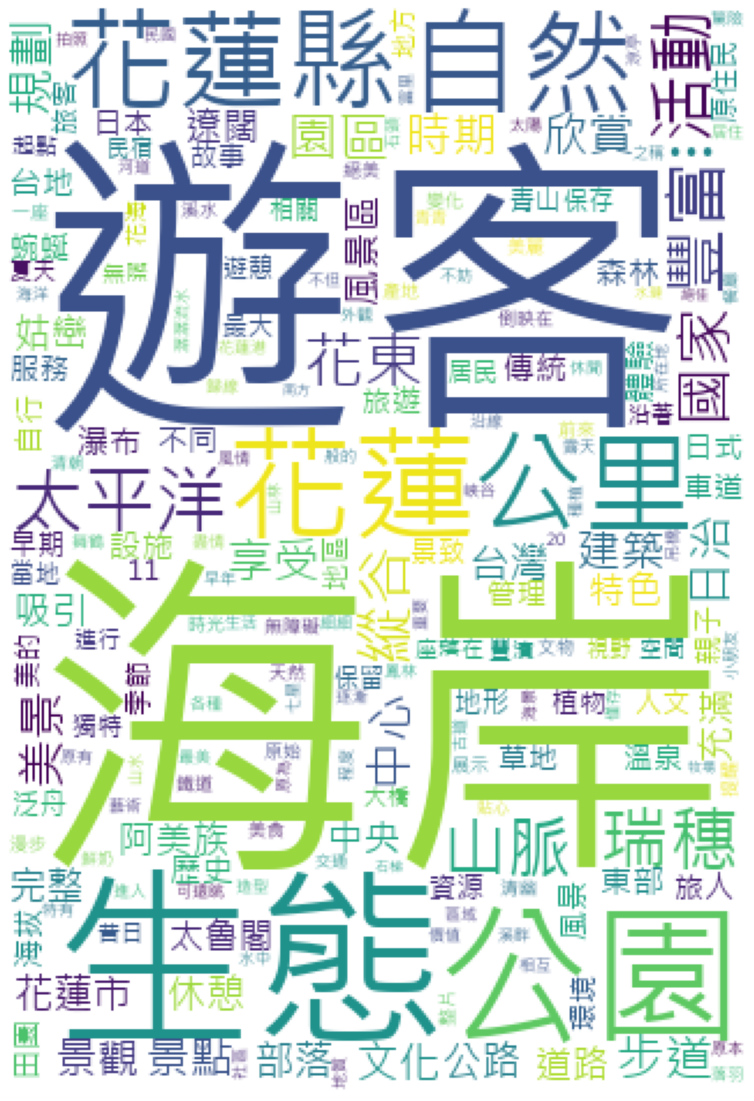

In [61]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()